In [1]:
import numpy as np
from astropy.table import Table

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

POPSYCLE SIM

In [2]:
pops = Table.read("data/research_paper/popsycle_sim.fits").to_pandas()

OB110462 - Mass gap classified data

In [3]:
ob = Table.read("data/research_paper/OB110462_DW_post.fits").to_pandas() #color data
ob.head()

,logLike,t0,u0_amp,tE,log10_thetaE,piS,piE_E,piE_N,xS0_E,xS0_N,muS_E,muS_N,mL,piL,piRel,muL_E,muL_N,muRel_E,muRel_N
0,184.877683,55763.312017,-0.051724,287.263116,0.728651,0.135751,0.021247,-0.093013,0.229670,-0.213814,0.066662,1.157038,6.890218,0.646538,0.510787,-1.449263,7.793189,1.515925,-6.636151
1,189.491588,55763.143207,-0.056239,273.684662,0.363211,0.123753,0.019904,-0.110011,0.229638,-0.214271,0.122164,1.132030,2.534837,0.381767,0.258013,-0.426201,4.162822,0.548365,-3.030792
2,191.105374,55762.869349,-0.059092,280.197751,0.597241,0.117932,0.019986,-0.119649,0.230059,-0.214283,0.031534,1.162280,4.004285,0.597806,0.479873,-0.818066,6.248444,0.849601,-5.086164
3,191.884685,55764.431058,-0.042804,279.152526,0.617667,0.098635,0.025575,-0.087679,0.229609,-0.214235,0.126121,1.152938,5.574564,0.477333,0.378698,-1.393074,6.361090,1.519195,-5.208152
4,192.296255,55762.025369,-0.067009,273.444603,0.572748,0.138009,0.020906,-0.127337,0.229948,-0.214424,0.060268,1.204426,3.557838,0.620489,0.482480,-0.748844,6.132681,0.809112,-4.928255


In [4]:
ob.columns

Index(['logLike', 't0', 'u0_amp', 'tE', 'log10_thetaE', 'piS', 'piE_E',
       'piE_N', 'xS0_E', 'xS0_N', 'muS_E', 'muS_N', 'mL', 'piL', 'piRel',
       'muL_E', 'muL_N', 'muRel_E', 'muRel_N'],
      dtype='object')

combine data

In [5]:
popsCols = list(pops.columns)
obCols = list(ob.columns)
len(pops) + len(ob)

23139

In [6]:
wanted_ob = ["t0","u0_amp","tE","log10_thetaE","piE_E","muS_E","mL","piRel","muL_E","muRel_E"]
wanted_pops = ["t0","u0","t_E","theta_E","pi_E","mu_b_S","mass_L","pi_rel","mu_b_L","mu_rel"]

ob_to_pops = {"t0":"t0", "u0_amp":"u0","tE":"t_E","log10_thetaE":"theta_E","piE_E":"pi_E","muS_E":"mu_b_S","mL":"mass_L","piRel":"pi_rel","muL_E":"mu_b_L","muRel_E":"mu_rel"}


def gk(val,d=ob_to_pops):
    keys = [k for k, v in d.items() if v == val]
    if keys:
        return keys[0]
    return None


dfWhole = pd.DataFrame()
for j in wanted_ob:
    for k in range(len(ob[j])):
        dfWhole.at[k,j] = ob[j][k] #0,x 

dict = {"id":[]}

for j in wanted_pops:
    jVal = gk(j)
    dict[jVal] = pops[j]

for i in range(len(pops["rem_id_L"])):
    dict["id"].append(pops["rem_id_L"][i])

dfTotal = pd.concat([dfWhole,pd.DataFrame(dict)])


Current class labels

- 0 = star
- 101 = white dwarf , 
- 102 = neutron star
- 103 = black hole

Changed/altered class Labels
- 0 = star
- 1 = mass gap bh (current nan)
- 2 = white dwarf
- 3 = neutron star
- 4 = regular bh

In [7]:
massGP = [val for val in dfTotal["mL"] if val >= 2.5 and val <= 5]
len(massGP)

3285

In [8]:
dfTotal

,t0,u0_amp,tE,log10_thetaE,piE_E,muS_E,mL,piRel,muL_E,muRel_E,id
0,55763.312017,-0.051724,287.263116,0.728651,0.021247,0.066662,6.890218,0.510787,-1.449263,1.515925,NaN
1,55763.143207,-0.056239,273.684662,0.363211,0.019904,0.122164,2.534837,0.258013,-0.426201,0.548365,NaN
2,55762.869349,-0.059092,280.197751,0.597241,0.019986,0.031534,4.004285,0.479873,-0.818066,0.849601,NaN
3,55764.431058,-0.042804,279.152526,0.617667,0.025575,0.126121,5.574564,0.378698,-1.393074,1.519195,NaN
4,55762.025369,-0.067009,273.444603,0.572748,0.020906,0.060268,3.557838,0.482480,-0.748844,0.809112,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19713,-100.757093,-0.002355,10.272065,0.156485,0.026858,-2.123513,0.717312,0.004203,3.368475,5.564230,101.0
19714,44.697865,0.031002,44.315966,0.413579,0.080408,-0.152435,0.633246,0.033255,3.079775,3.408702,101.0
19715,36.049509,-0.020305,41.374829,0.282264,0.060556,-0.406050,0.573866,0.017093,-1.207997,2.491783,101.0
19716,107.731479,-0.341648,50.540982,0.495956,0.070537,-0.167646,0.865635,0.034983,1.031318,3.584180,101.0


In [9]:
dfTotal = dfTotal.fillna(1)
dfTotal = pd.concat([dfTotal[[col for col in dfTotal.columns if col != "id"]], dfTotal["id"].replace(101,2)], axis=1)
dfTotal = pd.concat([dfTotal[[col for col in dfTotal.columns if col != "id"]], dfTotal["id"].replace(102,3)], axis=1)
dfTotal = pd.concat([dfTotal[[col for col in dfTotal.columns if col != "id"]], dfTotal["id"].replace(103,4)], axis=1)
print(dfTotal.isna().sum())


t0              0
u0_amp          0
tE              0
log10_thetaE    0
piE_E           0
muS_E           0
mL              0
piRel           0
muL_E           0
muRel_E         0
id              0
dtype: int64


In [10]:
dfTotal["id"].value_counts()

0.0    17153
1.0     3421
2.0     2088
3.0      276
4.0      201
Name: id, dtype: int64

Preprocess data

In [11]:
dfTotal.dtypes

t0              float64
u0_amp          float64
tE              float64
log10_thetaE    float64
piE_E           float64
muS_E           float64
mL              float64
piRel           float64
muL_E           float64
muRel_E         float64
id              float64
dtype: object

In [12]:
print(dfTotal.skew())
print("_________________________")
print(" ")
print(dfTotal.kurtosis())

t0              1.983625
u0_amp          0.401305
tE              1.887421
log10_thetaE    4.519006
piE_E           2.087928
muS_E          -0.109301
mL              3.042050
piRel           3.724419
muL_E          -0.087966
muRel_E         1.331930
id              2.110386
dtype: float64
_________________________
 
t0               1.936378
u0_amp           2.476196
tE               1.877551
log10_thetaE    51.244954
piE_E           30.167515
muS_E            1.872167
mL              13.631273
piRel           59.298826
muL_E            2.442283
muRel_E          7.202166
id               4.426641
dtype: float64


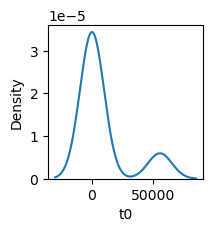

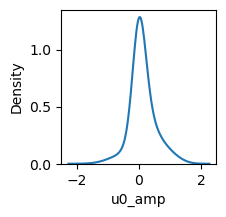

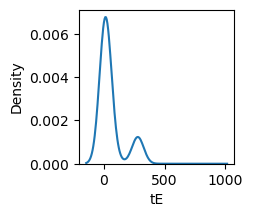

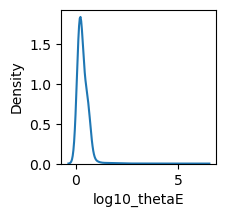

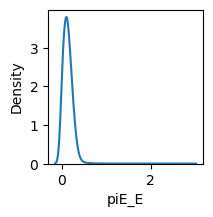

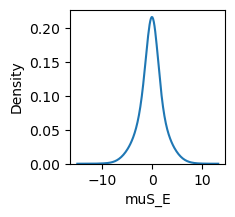

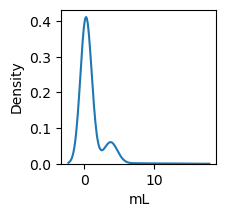

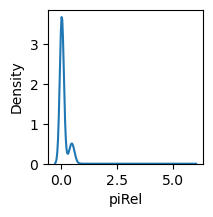

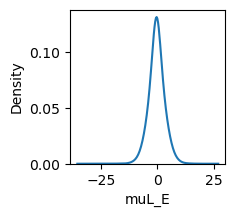

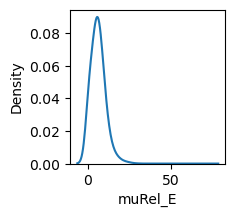

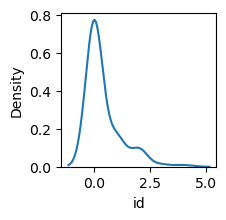

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 2,2
for col in list(dfTotal.columns):
    plt.figure()
    sns.kdeplot(dfTotal[col],bw_method=0.5)
    
    

Deal with imbalanced dataset (labels)

classes 3 and 4 are critical for prediction - neutron stars can fall in the mass gap, and black holes can be similar to mass gap black holes

we should upsample to preserve data: SMOTE-TOMEK link algorithm

In [14]:
dfTotal["id"].value_counts()

0.0    17153
1.0     3421
2.0     2088
3.0      276
4.0      201
Name: id, dtype: int64

split data

In [15]:
from sklearn.model_selection import train_test_split
xCols = [col for col in dfTotal.columns if col != "id"]
x_data = dfTotal[xCols]
y_data = dfTotal["id"]

X_train, X_t, y_train, y_t = train_test_split(x_data, y_data, test_size = 0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_t,y_t,test_size=0.2)

SMOTETomek fit for even data

In [16]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_res,y_res=smk.fit_resample(X_train, y_train)

smk2 = SMOTETomek()
X_testRes, y_testRes = smk2.fit_resample(X_test,y_test)

vie PCA'd data

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=1)
Xcop = X_res.copy()
Xcop = pca.fit_transform(Xcop)

In [19]:
y_res.value_counts()

1.0    10277
4.0    10274
3.0    10267
2.0    10114
0.0    10109
Name: id, dtype: int64

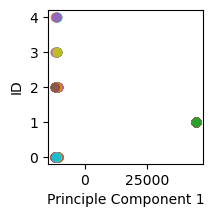

In [20]:
fig = plt.figure()
ax = fig.add_subplot()

for i in range(1000):
    ax.scatter(Xcop[i][0], y_res[i])

ax.set_xlabel('Principle Component 1')
ax.set_ylabel('ID')

plt.show()

Change the y's to vectors with indices

- train data: X_res, y_res
- val data: X_val, y_val
- train data: X_testRes, y_testRes

In [21]:
y_res = y_res.to_numpy()
y_val = y_val.to_numpy()
y_testRes = y_testRes.to_numpy()

In [22]:
y_res = y_res.astype(int)
y_val = y_val.astype(int)
y_testRes = y_testRes.astype(int)

In [23]:
arr1 = []
for i in range(len(y_res)):
    thing1 = [0,0,0,0,0]
    thing1[y_res[i]]=1
    arr1.append(thing1)
        
arr2 = []
for j in range(len(y_val)):
    thing2 = [0,0,0,0,0]
    thing2[y_val[j]]=1
    arr2.append(thing2)

arr3 = []
for k in range(len(y_testRes)):
    thing3 = [0,0,0,0,0]
    thing3[y_testRes[k]]=1 
    arr3.append(thing3)


yTraining = np.array(arr1)
yValidation = np.array(arr2)
yTesting = np.array(arr3)

Model Building

imports

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [25]:
def model(metrics):
   
    inputs = keras.Input(shape=(10,))
    net = tf.keras.layers.Dense(32, activation='relu')(inputs)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(64, activation='relu')(net)
    out = tf.keras.layers.Dense(5, activation='softmax')(net)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=out)
    model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=metrics)
    
    return model

In [26]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [27]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

massDet = model(METRICS)
massDet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 2,789
Trainable params: 2,789
Non-trainable params: 0
_________________________________________________________________


In [28]:
train_history = massDet.fit(X_res, yTraining, validation_data=(X_val, yValidation), epochs=4000, verbose=2, callbacks=[es])

Epoch 1/4000
1596/1596 - 8s - loss: 1561.0062 - accuracy: 0.6839 - precision: 0.2077 - recall: 0.2062 - val_loss: 30.1824 - val_accuracy: 0.6693 - val_precision: 0.1635 - val_recall: 0.1587 - 8s/epoch - 5ms/step
Epoch 2/4000
1596/1596 - 5s - loss: 97.9139 - accuracy: 0.7153 - precision: 0.2852 - recall: 0.2812 - val_loss: 31.2685 - val_accuracy: 0.6863 - val_precision: 0.1912 - val_recall: 0.1760 - 5s/epoch - 3ms/step
Epoch 3/4000
1596/1596 - 4s - loss: 37.4866 - accuracy: 0.7252 - precision: 0.3086 - recall: 0.3014 - val_loss: 30.2458 - val_accuracy: 0.6922 - val_precision: 0.1942 - val_recall: 0.1712 - 4s/epoch - 2ms/step
Epoch 4/4000
1596/1596 - 4s - loss: 27.4322 - accuracy: 0.7338 - precision: 0.3280 - recall: 0.3158 - val_loss: 27.0837 - val_accuracy: 0.7023 - val_precision: 0.2044 - val_recall: 0.1690 - 4s/epoch - 2ms/step
Epoch 5/4000
1596/1596 - 4s - loss: 23.4703 - accuracy: 0.7389 - precision: 0.3400 - recall: 0.3248 - val_loss: 23.5780 - val_accuracy: 0.7076 - val_precision

In [29]:
massDet.evaluate(X_testRes, yTesting, verbose=2)

850/850 - 2s - loss: 0.1873 - accuracy: 0.9811 - precision: 0.9566 - recall: 0.9485 - 2s/epoch - 2ms/step


[0.18732814490795135,
 0.9810844659805298,
 0.9565572142601013,
 0.9484991431236267]

In [30]:
massDet.save_weights('Model/save_model/model')

In [56]:
modl = model(METRICS)
modl.load_weights("Model/save_model/model")

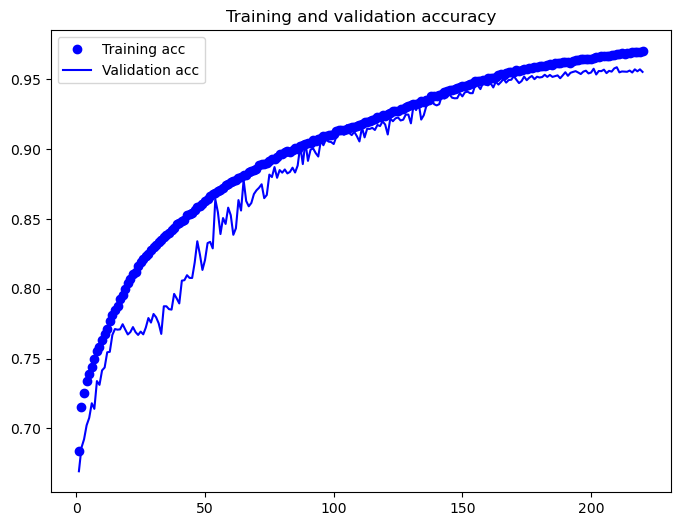

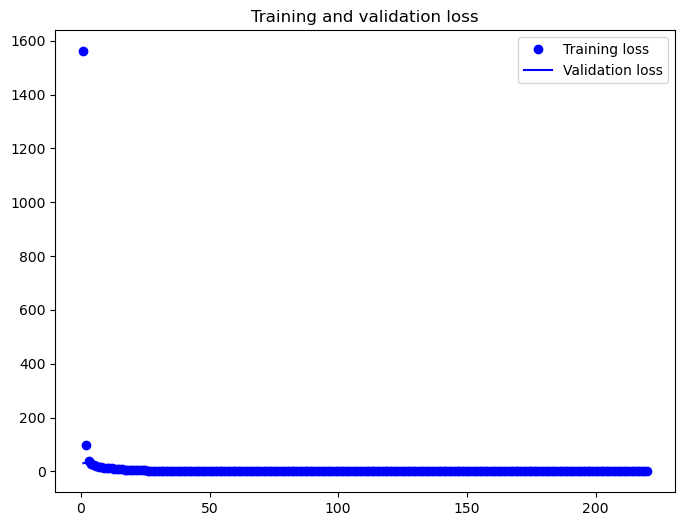

In [96]:
acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(8, 6), dpi=100)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [101]:
t_pred = modl.predict(X_testRes)
t_true = yTesting

850/850 [==============================] - 3s 3ms/step


In [105]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(modl, [0,1,2,3,4])

c:\Users\kulka\OneDrive\Documents\Python_Class\Anaconda\anacon\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


850/850 [==============================] - 3s 3ms/step


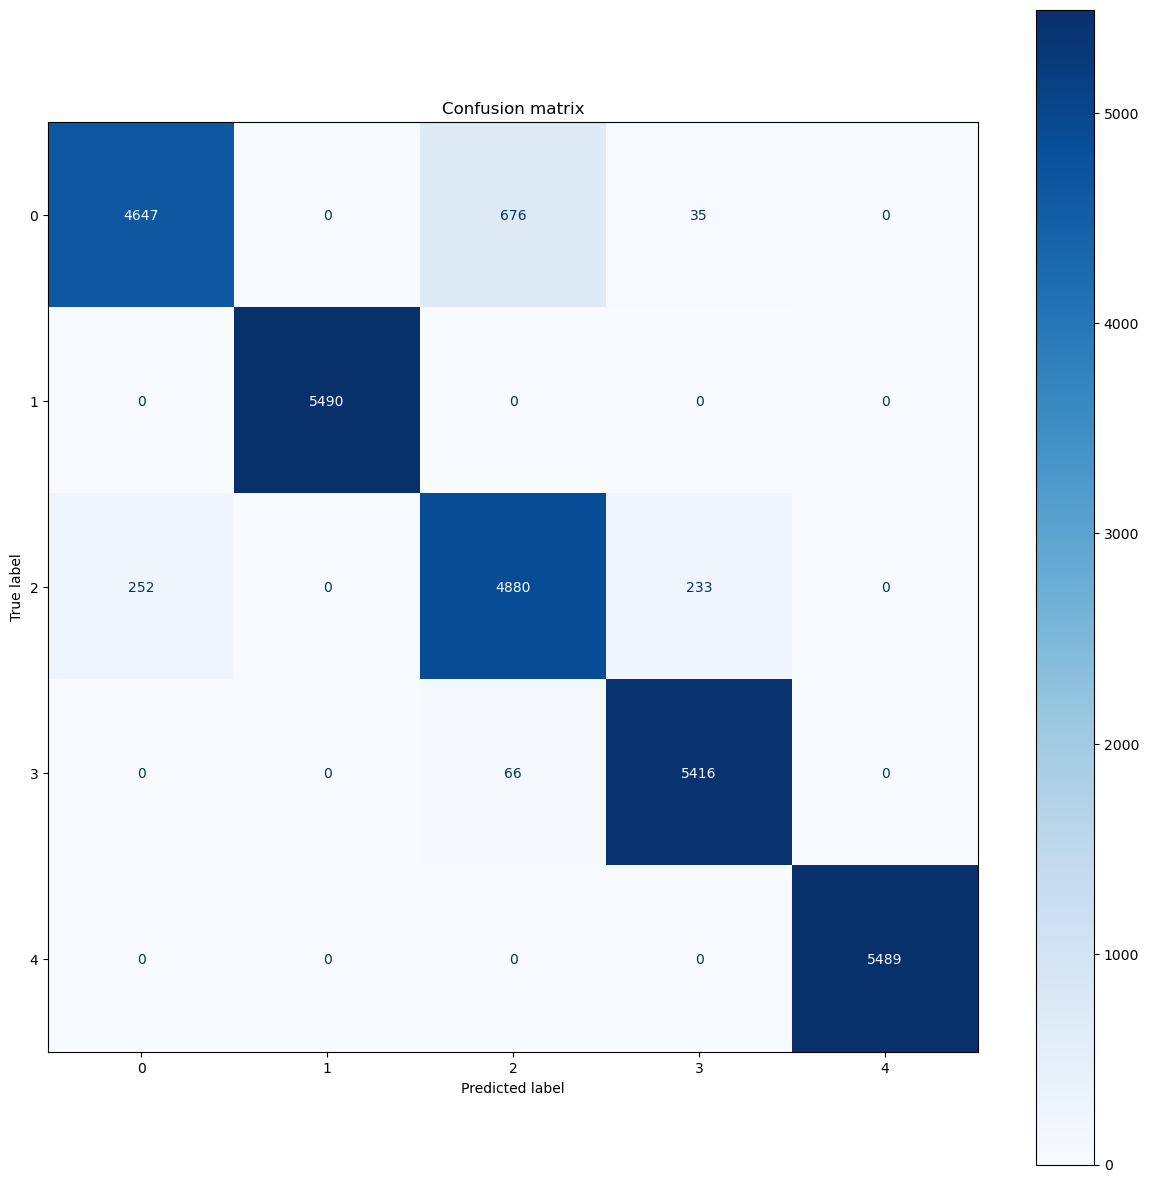

In [112]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(classifier, X=X_testRes, y_true=np.argmax(yTesting,axis=1),cmap=plt.cm.Blues)
plt.title('Confusion matrix')
fig = disp.figure_
fig.set_figwidth(15)
fig.set_figheight(15) 
plt.show()